In [324]:
# X Kapitel 5: Building Datesets
# In diesem Kapitel werden die Datensätze vorbereitet, die den Rest des Buches verwendet werden
import numpy as np

# A. Iris Datensatz
# Einlesen des Datensatzes
with open('iris/iris.data') as f:
    lines = [i[:-1] for i in f.readlines()]


# Extrahieren des Targetvekotors 
n = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# Wandelt Klassen Label in ein numeriches Label um
y = [n.index(i.split(',')[-1]) for i in lines if i != '']
y = np.array(y, dtype='uint8')
# print(y)

# Extrahieren der features + umwandeln in fLoats
x = [[float(j) for j in i.split(',')[:-1]] for i in lines if i != '']
x = np.array(x)
# print(x)

# Randomisieren der Zeilen in x und y über einen Index
index = np.argsort(np.random.random(y.shape[0]))
x = x[index]
y = y[index]
print(x.shape)
print(y.shape)
# Speichern der Datensätze
np.save('iris/iris_features.npy', x)
np.save('iris/iris_labels.npy', y)



(150, 4)
(150,)


(569,)
212
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0

{'whiskers': [<matplotlib.lines.Line2D at 0x1141c35aae0>,
 'caps': [<matplotlib.lines.Line2D at 0x1141c35b5f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1141c298b30>,
 'medians': [<matplotlib.lines.Line2D at 0x1141c35bc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1141c35bf50>,
 'means': []}

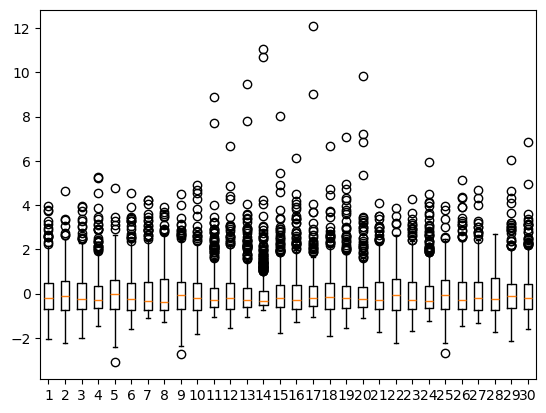

In [30]:
# B. Breast Cancer Dataset
import re

import matplotlib.pyplot as plt

# 1) Lines einlesen und letztes Zeichen (\n) entfernen
with open('wdbc.data') as f:
    lines = [l[:-1] for l in f.readlines()]
    
# 2) Label extrahieren (M=0, B=1)
# - meine Lösung
y = [int(bool(re.search(r'[M]', line))) for line in lines]
y = np.array(y, dtype='uint8')

# - Buch Lösung
n = ['M', 'B']
y = np.array([n.index(line.split(',')[1]) for line in lines])

print(y.shape)
print(len(np.where(y==0)[0])) # Fälle mit Brustkrebs
print(y)

# 3) Daten extrahieren (ohne Patientennummer)
x = [[float(value) for value in line.split(',')[2:]] for line in lines]
x = np.array(x)
print(x.shape)
print(x)

# 4) Daten randomisieren
idx = np.argsort(np.random.random(y.shape[0]))
x = x[idx,:]
y = y[idx]

# 5) Standardisierung der Features
xst = (x - x.mean(axis=0))/x.std(axis=0)

# 6) Daten speichern
np.save('cancer_features_standard.npy', xst)
np.save('cancer_features.npy', x)
np.save('cancer_target.npy', y)

plt.boxplot(xst)
# Visualisierung weist darauf hin, dass die Daten wahrscheinlich nicht von einer Normalverteilung stammen

In [90]:
# C) MNIST Digits
# Es wird ein fertiger Datensatz von Keras verwendet, der in weitere Datensätze unterteilt wird
# a) einen Datensatz, indem die Bilder (2-Dimensionen 28X28) in einem Vektor (784X1) umgewandelt werden (für klassische Modelle)
# b) einen Datensatz, indem die Pixel (2D) systematisch vertauscht werden (Bilder nicht mehr für Menschen erkennbar)
# c) eine Vektorversion von b)
# >> b und c dienen dazu die UNterschiede von NN und CNN darzustellen

# import sys
# !pip install keras
# !pip install tensorflow
#!pip install pandas
# !pip install sklearn


import keras
from keras.api.datasets import mnist

# Datensatz lesen
(xtrn, ytrn), (xtst, ytst) = mnist.load_data()
# Randomisieren der Zeilen im Test-und Trainingsdatensatz
idx = np.argsort(np.random.random(ytrn.shape[0]))
print(idx[0])
print(xtrn.shape)
xtrn = xtrn[idx]
ytrn = ytrn[idx]

idx = np.argsort(np.random.random(ytst.shape[0]))
xtst = xtst[idx]
ytst = ytst [idx]

np.save('mnist_train_images.npy', xtrn)
np.save('mnist_train_label.npy', ytrn)
np.save('mnist_test_label.npy', xtst)
np.save('mnist_test_label.npy', ytst)

# Vektorized Dataset
xtrnv = xtrn.reshape(60000, 28*28)
xtstv = xtst.reshape(10000, 28*28)

np.save('mnist_train_vectors.npy', xtrnv)
np.save('mnist_test_vectors.npy', xtstv)

# Vektorized Dataset mit Randomisierung
idx = np.argsort(np.random.random(28*28))
for i in range(xtrnv.shape[0]):
    xtrnv[i] = xtrnv[i, idx]
for i in range(xtstv.shape[0]):
    xtstv[i] = xtstv[i, idx]

np.save('mnist_train_scrambled_vectors.npy', xtrnv)
np.save('mnist_test_scrambled_vectors.npy', xtstv)

# Image Dataset mit Randomisierung
t = np.zeros((60000, 28, 28))
for i in range(t.shape[0]):
    t[i,:,:] = xtrnv[i, :].reshape((28,28))
np.save('mnist_train_scrambled_images.npy', t)

t = np.zeros((10000, 28, 28))
for i in range(t.shape[0]):
    t[i, :, :] = xtst[i, :].reshape((28, 28))
np.save('mnist_test_scrambles_images.npy', t)


48755
(60000, 28, 28)


In [106]:
# D. CIFAR-10
# Der Datensatz enthält 60.000 32X32 RGB images
from keras.api.datasets import cifar10

# Laden der Daten
# (xtrn, ytrn), (xtst, ytst) = cifar10.load_data()

# Randomisieren der Reihen
idx = np.argsort(np.random.random(xtrn.shape[0]))
xtrn = xtrn[idx]
ytrn = ytrn[idx]

idx = np.argsort(np.random.random(xtst.shape[0]))
xtst = xtst[idx]
ytst = ytst[idx]

np.save('cifar10_train_images.npy', xtrn)
np.save('cifar10_test_images.npy', xtst)
np.save('cifar10_train_labels.npy', ytrn)
np.save('cifar10_test_labels.npy', ytst)

# Vorktorisieren der Daten
xtrnv = xtrn.reshape(50000, 32*32*3)
xtstv = xtst.reshape(10000, 3072)

np.save('cifar10_train_vectors.npy', xtrnv)
np.save('cifar10_test_vectors.npy', xtstv)

(150, 2)
[0.87221781 0.12778219]


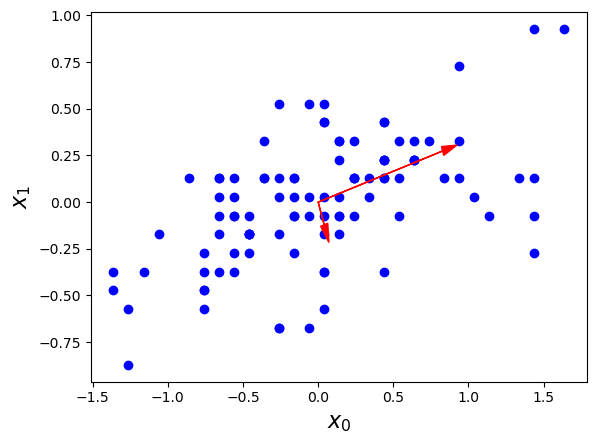

[0.92461621 0.05301557 0.01718514 0.00518309]
[0.92461621 0.97763178 0.99481691 1.        ]


In [326]:
# X Data Augmentation

# A Iris Dataset and PCA
# Nur ersten beiden Features werden geladen+
X = np.load('iris/iris_features.npy')[:,:2]
y = np.load('iris/iris_labels.npy')
from sklearn import decomposition
print(X.shape)

# Subset des Datensatzes mit Klasse 1 und 2
idx = np.where(y!=0)
X = X[idx]
# Standardizing values in Col 0 and 1
X[:,0] -= X[:,0].mean()
X[:,1] -= X[:,1].mean()

# Berechnen der PCA
pca = decomposition.PCA(n_components=2)
pca.fit(X)
v = pca.explained_variance_ratio_
print(v)

# Visualisierung der PCA
plt.scatter(X[:,0], X[:,1], marker='o', color='b')
ax = plt.gca()
x0 = v[0]*pca.components_[0,0]
y0 = v[0]*pca.components_[0,1]
ax.arrow(0, 0, x0, y0, head_width=0.05, head_length=0.1, fc='r', ec='r')
x1 = v[1]*pca.components_[1,0]
y1 = v[1]*pca.components_[1,1]
ax.arrow(0, 0, x1, y1, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.xlabel("$x_0$", fontsize=16)
plt.ylabel("$x_1$", fontsize=16)
plt.show()


# PCA-Augmentation
# 1) Augmentation auf Basis einer PCA transformiert den Datensatz in die neu berechneten Komponente
# 2) Dann wird normalverteilter Noise der unwichtigsten Komponente hinzugefügt (Ziel Komponente deren Summe 95% der Varianz erklären unangetastet lassen)
# 3) Dann wird der Datensatz rücktransformiert >> So entstehen neue Daten, die denen im Sample ähnlich sind, aber nicht ganz

def generateData(pca, X, start):
    original = pca.components_.copy()
    ncomp = pca.components_.shape[0]
    # 1) transformiert Daten
    a = pca.transform(X)
    # 2) zufälligen Noise der Komponente ab Start (sollte nur die enthalten, die verändert werden sollen)
    for i in range(start, ncomp):
        pca.components_[i,:] += np.random.normal(scale=0.1, size=ncomp) # std = 0.1 >> sehr wenig noise
    # 3) Rücktransformieren
    b = pca.inverse_transform(a)
    pca.components_ = original.copy()
    return b

def main():
    X = np.load('iris/iris_features.npy')
    y = np.load('iris/iris_labels.npy')
    
    # Create Test_train_split
    N = 120
    X_train = X[:N]
    y_train = y[:N]
    X_test = X[N:]
    y_test = y[N:] 

    # Calulate PCA
    pca = decomposition.PCA(n_components=4)
    pca.fit(X)
    print(pca.explained_variance_ratio_)
    print(np.cumsum(pca.explained_variance_ratio_))
    start = 2 # 2 Componente bleiben
    
    nsets = 10 # Anzahl an sample, die generiert werden sollen
    nsamp = X_train.shape[0]
    # 10*120 = 1200 Daten im Trainingsset
    newX = np.zeros((nsets*nsamp, X_train.shape[1]))
    newy = np.zeros(nsets*nsamp, dtype='uint8')

    # Aufüllen des neuen Datensatzes
    for i in range(nsets):
        # ersten 120 Zeilen = Originaldaten
        if (i == 0):
            newX[0:nsamp, :] = X_train
            newy[0:nsamp] = y_train
        else:
            # Dann werden jweils die nächsten 120 Zeilen gefüllt
            newX[(i*nsamp):(i*nsamp+nsamp), :] = generateData(pca, X_train, start)
            newy[(i*nsamp):(i*nsamp+nsamp)] = y_train

    # randomisieren der neuen Daten und speichern
    idx = np.argsort(np.random.random(nsets*nsamp))
    newX = newX[idx, :]
    newy = newy[idx]
    np.save('iris/iris_train_features_augmented.npy', newX)
    np.save('iris/iris_train_labels_augmented.npy', newy)
    np.save('iris/iris_test_features_augmented.npy', X_test)
    np.save('iris/iris_test_labels_augmented.npy', y_test)
    
main()



In [ ]:
# CIFAR-10 und Bild Augmentation
from PIL import Image

def augment(im, dim):
    img = Image.fromarray(im)
    # Invertieren
    if (np.random.random() < 0.5):
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
    # Rotieren und Centre-Crop
    if (np.random.random() < 0.3333):
        z = (32-dim)/2
        r = 10*np.random.random()-5 # Wählt einen Zufälligen Rotationswinkel (-5: 5)
        img = img.rotate(r, resample=Image.BILINEAR) # nutzt BILIEAR rotation, die etwas schöner ist als der default
        img = img.crop((z, z, 32-z, 32-z)) # center crop
    # Verschieben = Random Crop
    else: 
        x = int((32-dim-1)*np.random.random())
        y = int((32-dim-1)*np.random.random())
        img = img.crop((x, y, x+dim, y+dim))
    return np.array(img)

def main():
    X = np.load('cifar10/cifar10_train_images.npy')
    y = np.load('cifar10/cifar10_train_labels.npy')

    # Array für neuen Datensatz erstellen (n*factor= Bilder, 28*28 Dimensionen Pixel pro Bild mit 3 Zahlenwerten (RGB))
    factor = 10 # 10 neue Datenpunkte pro Bild
    dim = 28
    z = (32-dim)/2
    newX = np.zeros((X.shape[0]*factor, dim, dim, 3), dtype="uint8")
    newy = np.zeros(y.shape[0]*factor, dtype="uint8")
    k = 0 # Tracker, um Array Zeile für Zeile zu füllen

    # Datensatz mit Originalen und augmentierten Bildern füllen
    for i in range(X.shape[0]):
        im = Image.fromarray(X[i,:])
        im = im.crop((z, z, 32-z, 32-z)) # centre crop der Origniale
        newX[k,...] = np.array(im)
        newy[k] = y[i]
        k+=1
        # 9 weitere Bilder werden von dem ersten generiert
        for j in range(factor-1):
            newX[k,...] = augment(X[i,:], dim)
            newy[k] = y[i]
            k+=1
        
    # Randomisieren der Zeilen
    idx = np.argsort(np.random.random(newX.shape[0]))
    newX = newX[idx]
    newy = newy[idx]

    np.save('cifar10/cifar10_aug_train_images.npy', newX)
    np.save('cifar10/cifar10_aug_train_labels.npy', newy)

    # Kroppen der Testbilder und speichern in einen Datensatz
    X = np.load('cifar10/cifar10_test_images.npy')
    newX = np.zeros((X.shape[0], dim, dim, 3), dtype="uint8")
    for i in range(X.shape[0]):
        im = Image.fromarray(newX[i,:])
        im = im.crop((z, z, 32-z, 32-z))
        newX[i,...] = np.array(im)
    np.save('cifar10/cifar10_aug_test_images.npy', newX)

main()	

(500000, 28, 28, 3)
